In [43]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import squarify # pip install squarify
import matplotlib.pyplot as plt
from tqdm import *
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
# loading datasets
df1 = pd.read_csv('googleplaystore.csv')
df2 = pd.read_csv('googleplaystore_user_reviews.csv')

In [4]:
# exploring both the datasets

df1.head(5) # top 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df1.tail(5) # bottom 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df2.head(5) # top 5 rows

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
df2.tail(5) # bottom 5 rows

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [8]:
df1.info() # a total of 10841 apps 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df2.info() # a total of 64295 reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
# checking for null entries in both datasets
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [12]:
# checking for duplicated entries in both datasets
df1.duplicated().sum()

483

In [13]:
df2.duplicated().sum()

33616

In [14]:
# dropping duplicates
df1.drop_duplicates(subset='App', inplace=True)

In [15]:
# dropping nan
df1 = df1[df1['Android Ver'] != np.nan]

In [16]:
df1 = df1[df1['Android Ver'] != 'NaN']

In [17]:
df1 = df1[df1['Installs'] != 'Free']

In [18]:
df1 = df1[df1['Installs'] != 'Paid']

In [19]:
df1.info() # the final cleansed dataset contains 9659 apps

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null object
Size              9659 non-null object
Installs          9659 non-null object
Type              9658 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


# data cleaning
* Remove '+' from 'Number of Installs' to make it numeric
* Convert all app sizes to MB

In [20]:
# Installs : Remove + and ,
df1['Installs'] = df1['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df1['Installs'] = df1['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df1['Installs'] = df1['Installs'].apply(lambda x: int(x))

In [21]:
# checking for changes
df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
# Size : Remove 'M', Replace 'k' and divide by 10^-3
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df1['Size'] = df1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df1['Size'] = df1['Size'].apply(lambda x: float(x))
df1['Installs'] = df1['Installs'].apply(lambda x: float(x))

df1['Price'] = df1['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df1['Price'] = df1['Price'].apply(lambda x: float(x))

df1['Reviews'] = df1['Reviews'].apply(lambda x: int(x))

In [23]:
# checking for changes
df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# basic EDA

In [28]:
# dropping nulls
x = df1['Rating'].dropna()
y = df1['Size'].dropna()
z = df1['Installs'][df1.Installs!=0].dropna()
p = df1['Reviews'][df1.Reviews!=0].dropna()
t = df1['Type'].dropna()
price = df1['Price']


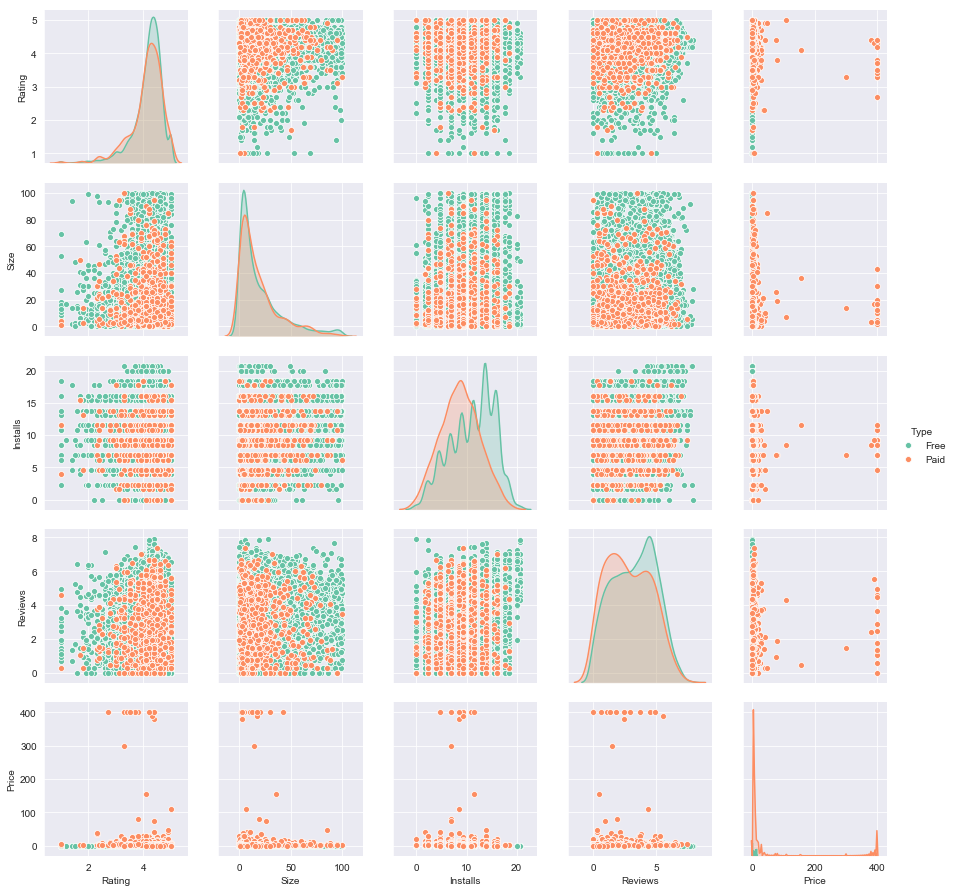

In [29]:
# plotting the pairplot
sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

# which category has the highest number of apps in the market?

In [41]:
number_of_apps_in_category = df1['Category'].value_counts().sort_values(ascending=True)


BEAUTY                   53
COMICS                   56
PARENTING                60
EVENTS                   64
ART_AND_DESIGN           64
HOUSE_AND_HOME           74
WEATHER                  79
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        85
ENTERTAINMENT           102
FOOD_AND_DRINK          112
EDUCATION               119
MAPS_AND_NAVIGATION     131
VIDEO_PLAYERS           163
DATING                  171
SHOPPING                202
TRAVEL_AND_LOCAL        219
BOOKS_AND_REFERENCE     222
SOCIAL                  239
NEWS_AND_MAGAZINES      254
PHOTOGRAPHY             281
HEALTH_AND_FITNESS      288
COMMUNICATION           315
SPORTS                  325
FINANCE                 345
LIFESTYLE               369
PRODUCTIVITY            374
PERSONALIZATION         376
MEDICAL                 395
BUSINESS                420
TOOLS                   827
GAME                    959
FAMILY                 1832
Name: Category, dtype: int64

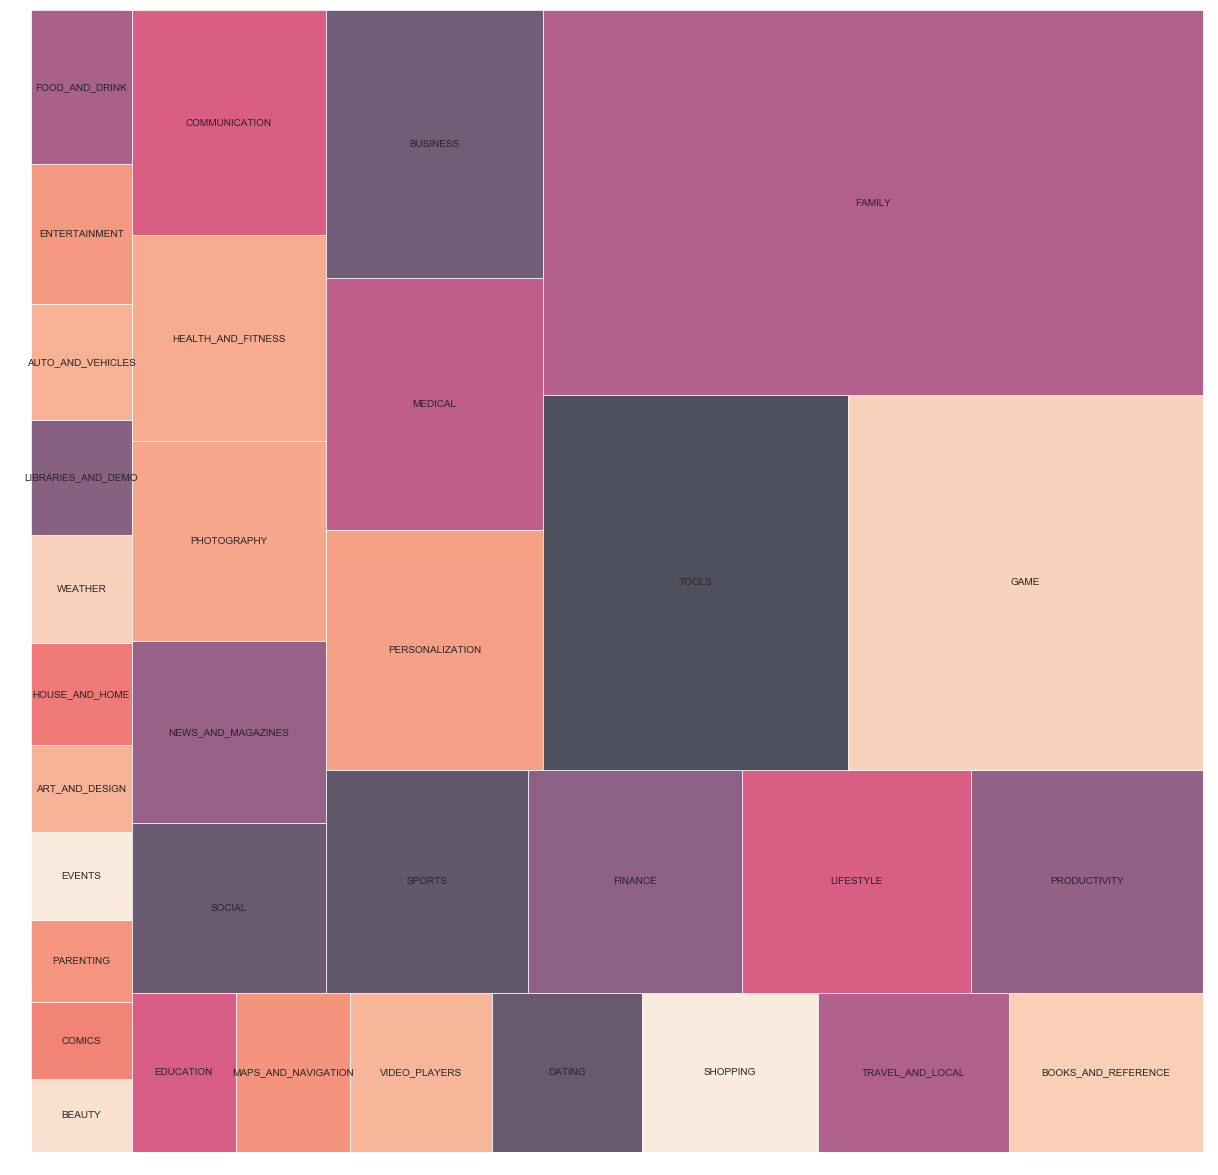

In [53]:
# plotting the categories
plt.figure(figsize=(21,21))
squarify.plot(sizes = number_of_apps_in_category.values, label = number_of_apps_in_category.index, alpha=.7 )
plt.axis('off')
plt.show()